# Predictive Insights Youth Income Prediction Challenge
* Can you predict if a young person in South Africa is employed?

In [1]:
!git clone https://github.com/koleshjr/Koding_With_Kolesh.git

Cloning into 'Koding_With_Kolesh'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 63 (delta 19), reused 46 (delta 7), pack-reused 0
Receiving objects: 100% (63/63), 344.05 KiB | 1.71 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [12]:
cd /content/Koding_With_Kolesh/utils/EDA

/content/Koding_With_Kolesh/utils/EDA


In [13]:
ls

eda.py  __pycache__/


In [14]:
from eda import *

In [15]:
cd /content/Koding_With_Kolesh/challenges/predictive_insights

/content/Koding_With_Kolesh/challenges/predictive_insights


In [16]:
ls

Test.csv  Train.csv


In [17]:
!pip install catboost

### Import

In [18]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
import catboost as catt

### Load the Datasets

In [55]:
import pandas as pd
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
display(train.head())

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,3.0,0 - 29 %,NaN,50 - 59 %,NaN,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,1.0,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,NaN,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0


In [56]:
categorical_cols, numerical_cols, target_column, id_column = datasetInfo(data=train, id_column= "Person_id", target_column= "Target")

Dataset Overview
----------------
Shape: (4020, 21)

Column Names
------------
['Person_id', 'Survey_date', 'Round', 'Status', 'Tenure', 'Geography', 'Province', 'Matric', 'Degree', 'Diploma', 'Schoolquintile', 'Math', 'Mathlit', 'Additional_lang', 'Home_lang', 'Science', 'Female', 'Sa_citizen', 'Birthyear', 'Birthmonth', 'Target']

Data Types
----------
Person_id           object
Survey_date         object
Round                int64
Status              object
Tenure             float64
Geography           object
Province            object
Matric             float64
Degree             float64
Diploma            float64
Schoolquintile     float64
Math                object
Mathlit             object
Additional_lang     object
Home_lang           object
Science             object
Female               int64
Sa_citizen           int64
Birthyear            int64
Birthmonth           int64
Target               int64
dtype: object

Missing Values
--------------
Home_lang          3639
Science

,count,mean,std,min,25%,50%,75%,max
Tenure,2626.000000,582.883092,621.220657,0.000000,95.000000,395.000000,819.000000,3560.000000
Birthyear,4020.000000,1997.462935,4.378334,1972.000000,1995.000000,1999.000000,2000.000000,2004.000000
Birthmonth,4020.000000,5.344030,3.805916,1.000000,1.000000,5.000000,9.000000,12.000000
Schoolquintile,2359.000000,2.696482,1.318409,0.000000,2.000000,3.000000,4.000000,5.000000
Round,4020.000000,3.129851,0.978014,1.000000,2.000000,3.000000,4.000000,4.000000
Female,4020.000000,0.564428,0.495893,0.000000,0.000000,1.000000,1.000000,1.000000
Target,4020.000000,0.271891,0.444989,0.000000,0.000000,0.000000,1.000000,1.000000
Matric,3012.000000,0.850598,0.356544,0.000000,1.000000,1.000000,1.000000,1.000000
Diploma,2211.000000,0.081411,0.273527,0.000000,0.000000,0.000000,0.000000,1.000000
Degree,2189.000000,0.078118,0.268418,0.000000,0.000000,0.000000,0.000000,1.000000


In [27]:
id_column

'Person_id'

### Find the differences between Train and Test

In [29]:
findDifferentialInfo(train= train, test= test, __featToExcl = [id_column, target_column])

100%|██████████| 19/19 [00:00<00:00, 183.48it/s]


,Feature,Unique values (train),Unique values in test not in train (and %),Unique values in train not in test (and %),NaN in train (and %),NaN in test (and %),% in the biggest cat. (train),dtype
0,Survey_date,79,0 (0.0%),1 (1.3%),0 (0.0%),0 (0.0%),3.0,object
1,Round,4,0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),49.2,int64
2,Status,7,0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),44.2,object
3,Tenure,641,134 (31.7%),352 (54.9%),1394 (34.7%),732 (37.8%),34.7,float64
4,Geography,3,0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),69.6,object
5,Province,9,0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),29.1,object
6,Matric,2,0 (0.0%),0 (0.0%),1008 (25.1%),524 (27.1%),63.7,float64
7,Degree,2,0 (0.0%),0 (0.0%),1831 (45.5%),888 (45.9%),50.2,float64
8,Diploma,2,0 (0.0%),0 (0.0%),1809 (45.0%),881 (45.6%),50.5,float64
9,Schoolquintile,6,0 (0.0%),0 (0.0%),1661 (41.3%),818 (42.3%),41.3,float64


* Tenure has 134 unique values in test not in Train
* The null distribution in train and test are relatively equal

### Visualizing Missing Values

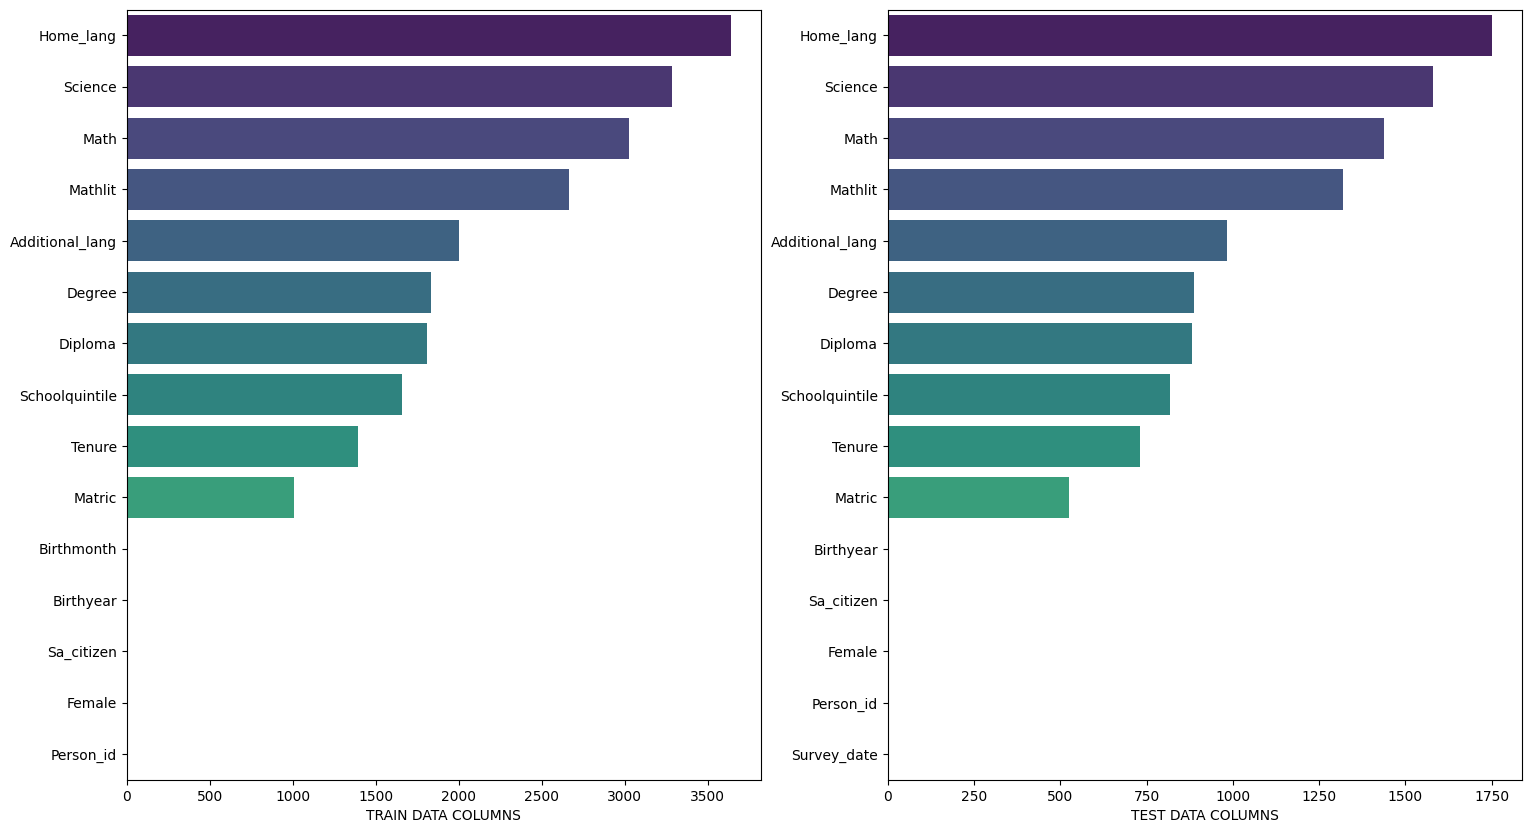

In [31]:
columnWiseNullDistributionComparison(train = train , test=test)

### Categorical Data Exploration

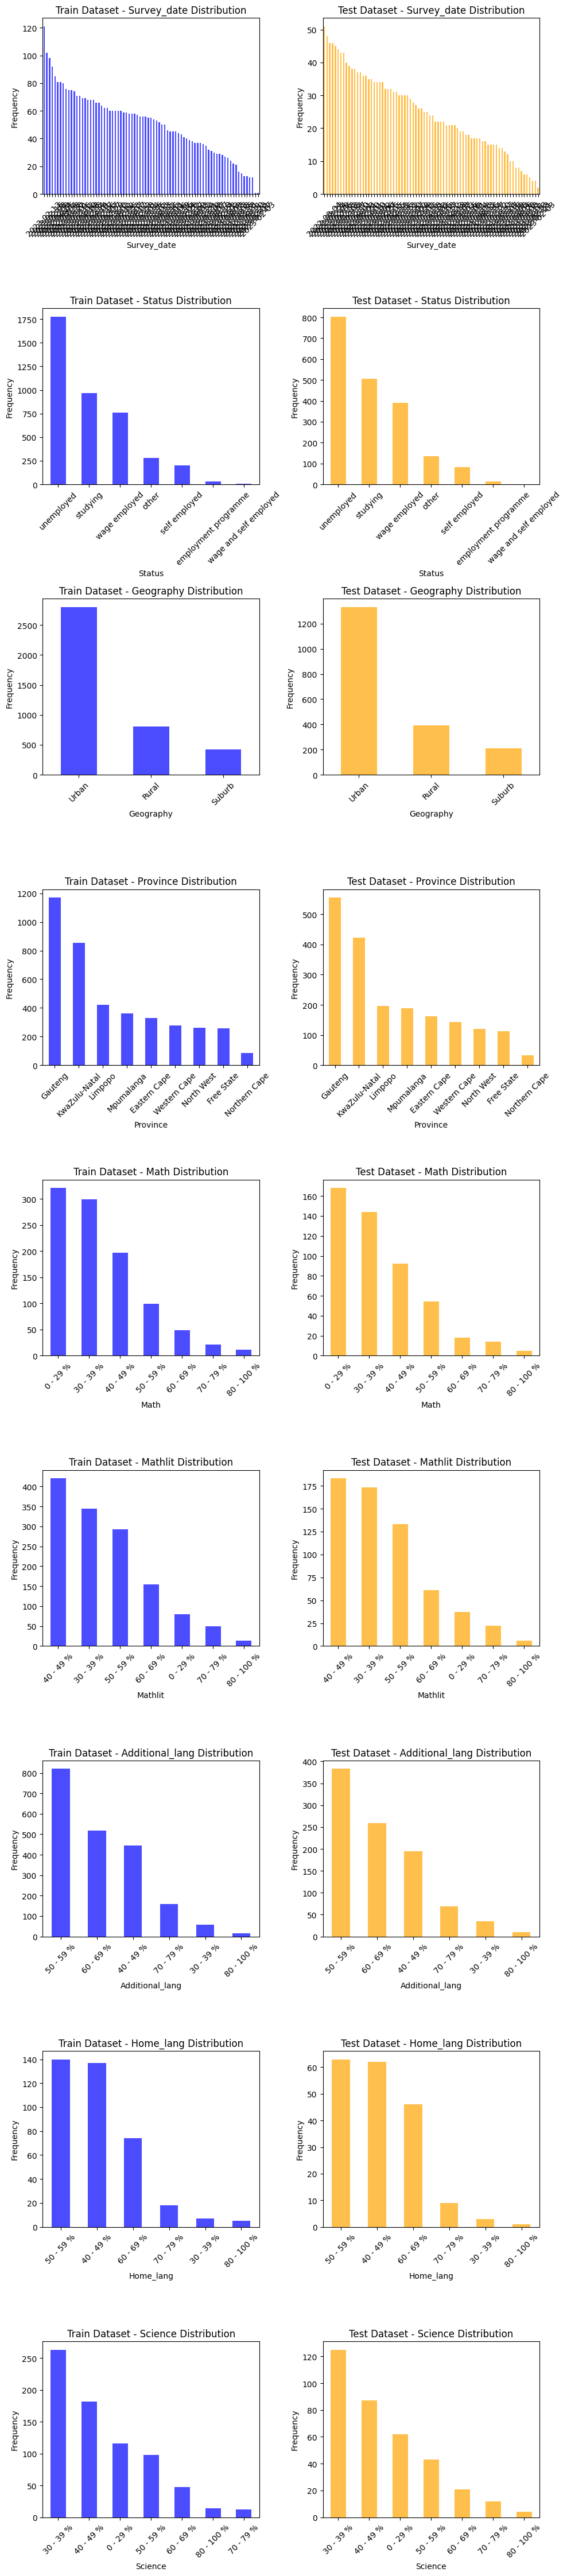

In [33]:
plotCategoricalDistributionSideBySide(train, categorical_cols, test)

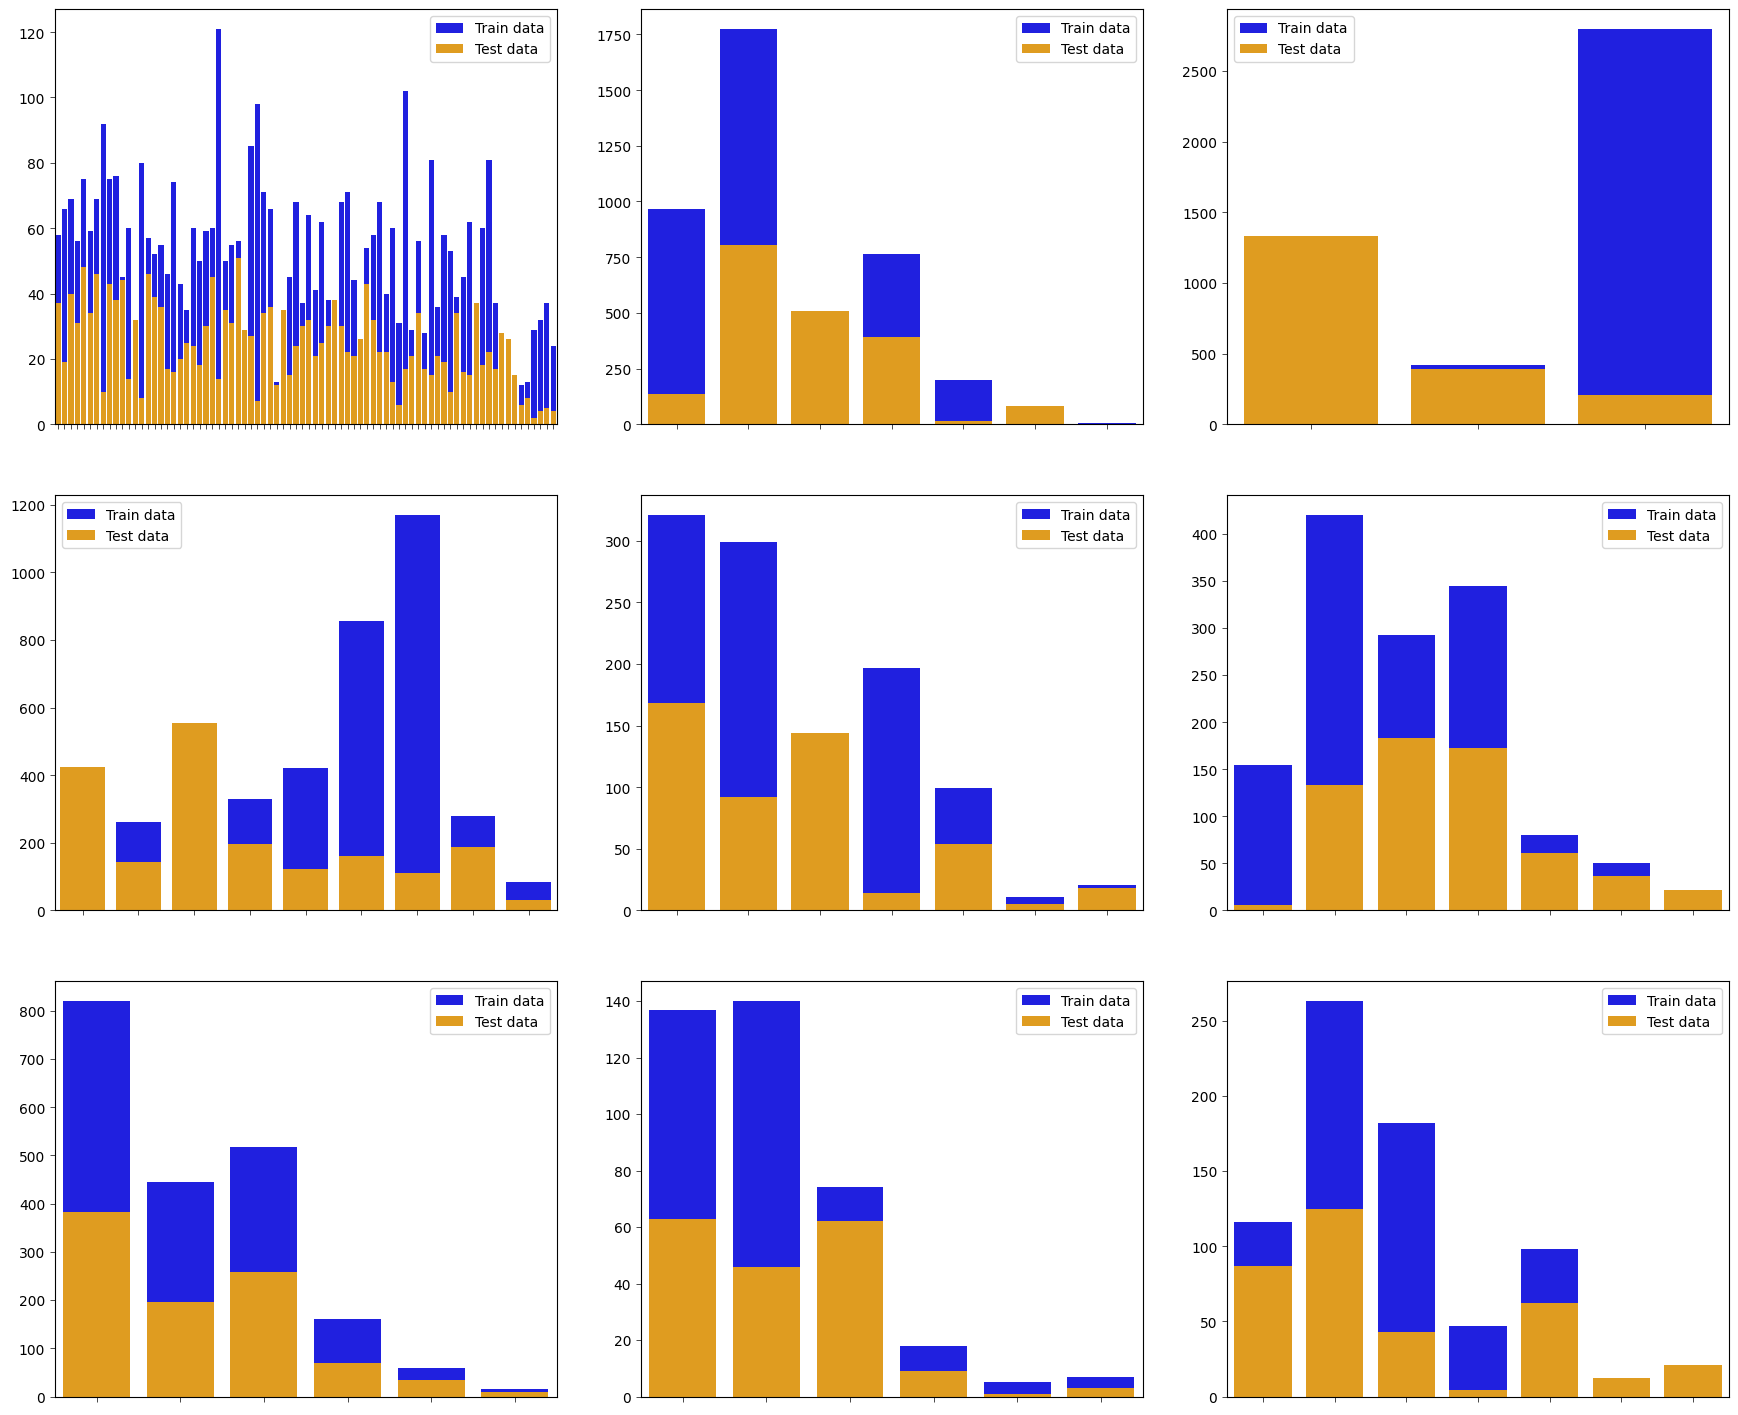

In [35]:
plotCategoricalDistributionOnTopOfEachOther(train, test, categorical_cols)

#### Numerical Data Exploration

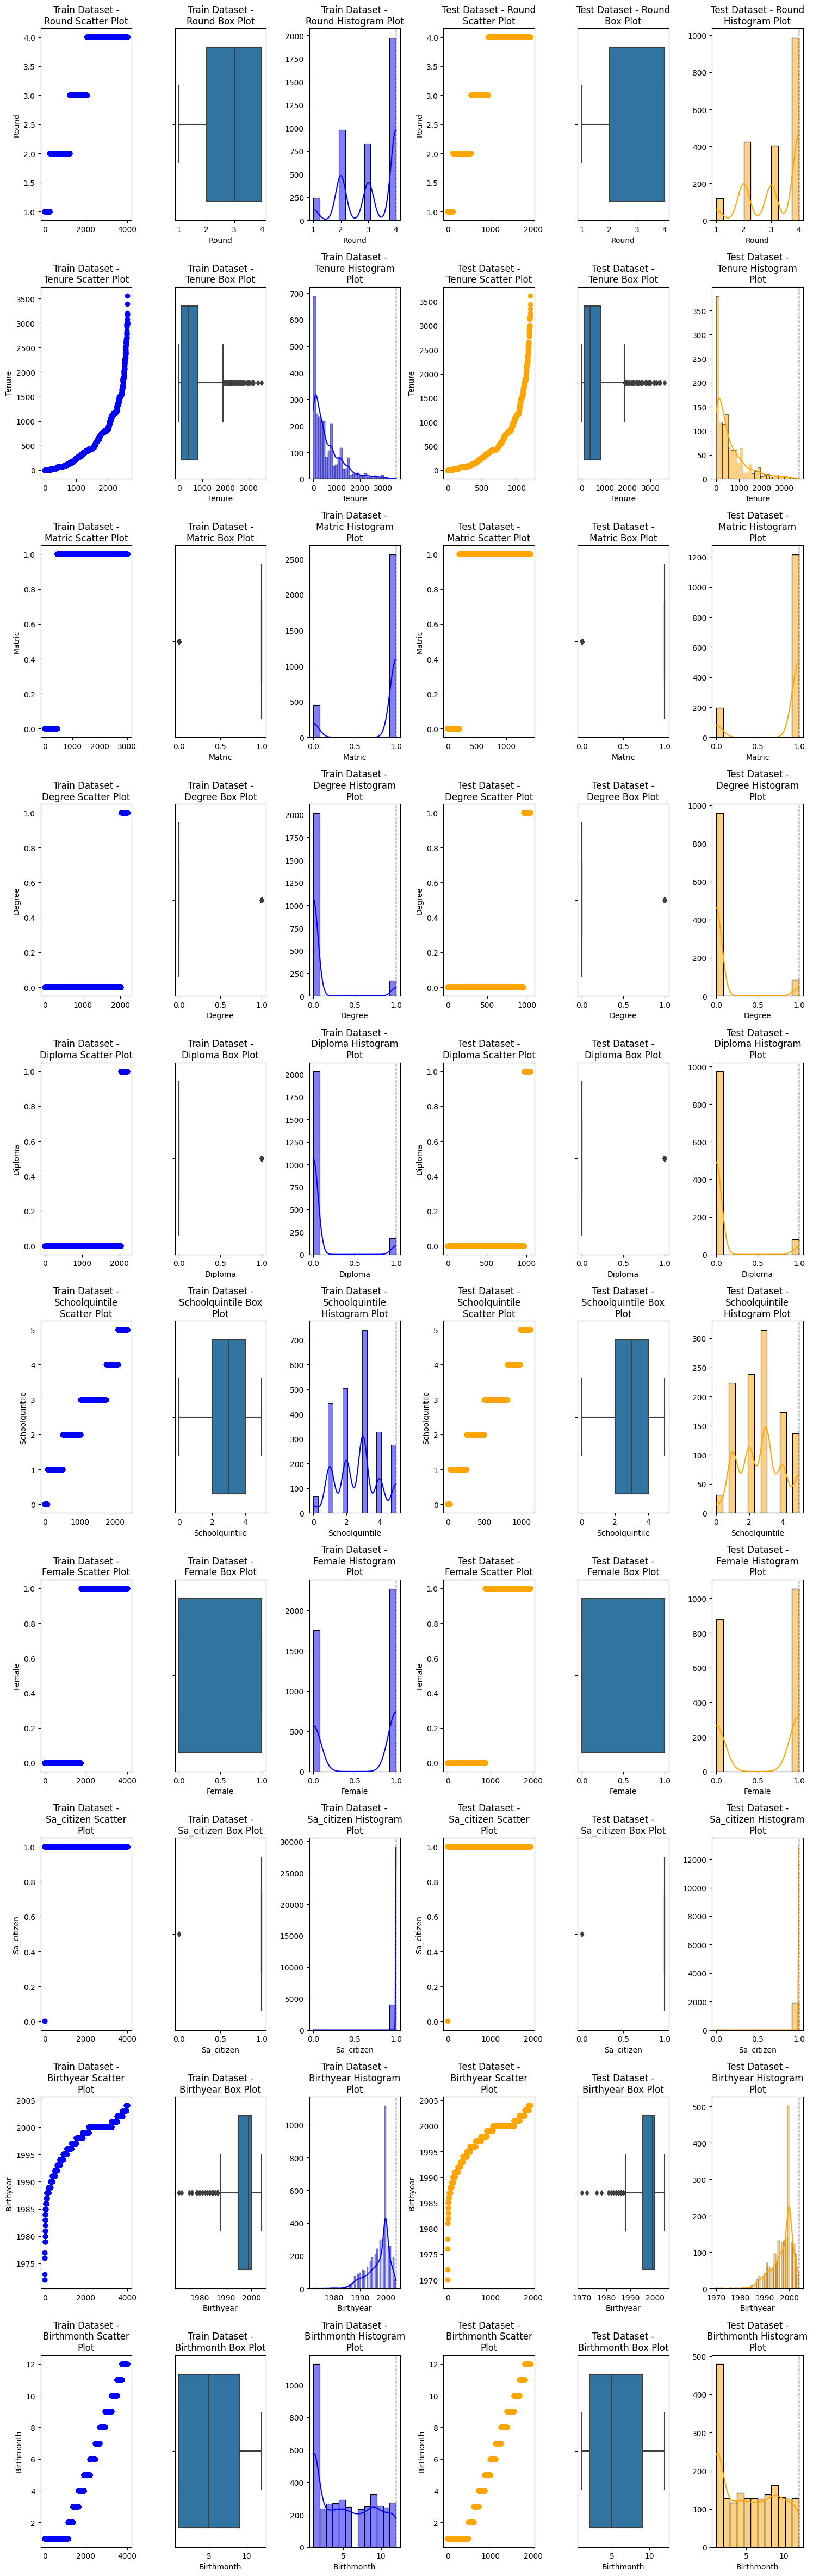

In [36]:
plotNumericalDistributionSideBySide(train, numerical_cols, test)

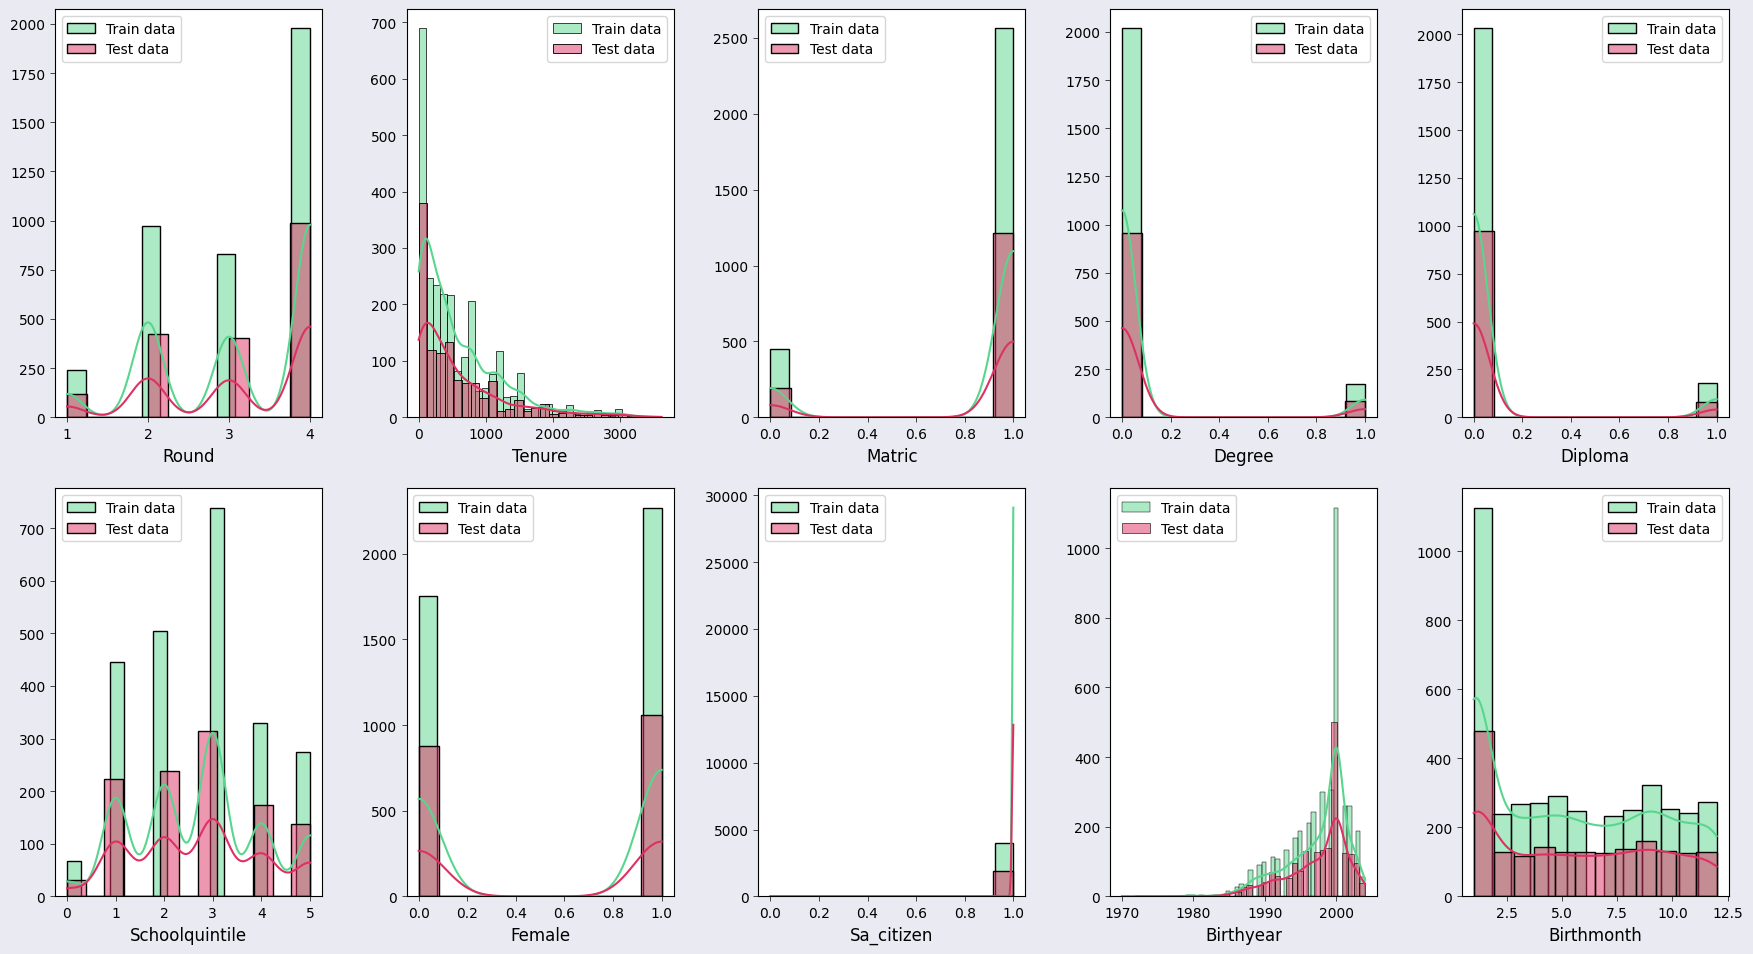

In [37]:
plotNumericalDistributionOnTopOfEachOther(train, test, numerical_cols)

### Plot the correlation heatmap

Total numerical columns: 10
Subset: 1
['Round', 'Tenure', 'Matric', 'Degree', 'Diploma', 'Schoolquintile', 'Female', 'Sa_citizen', 'Birthyear', 'Birthmonth']


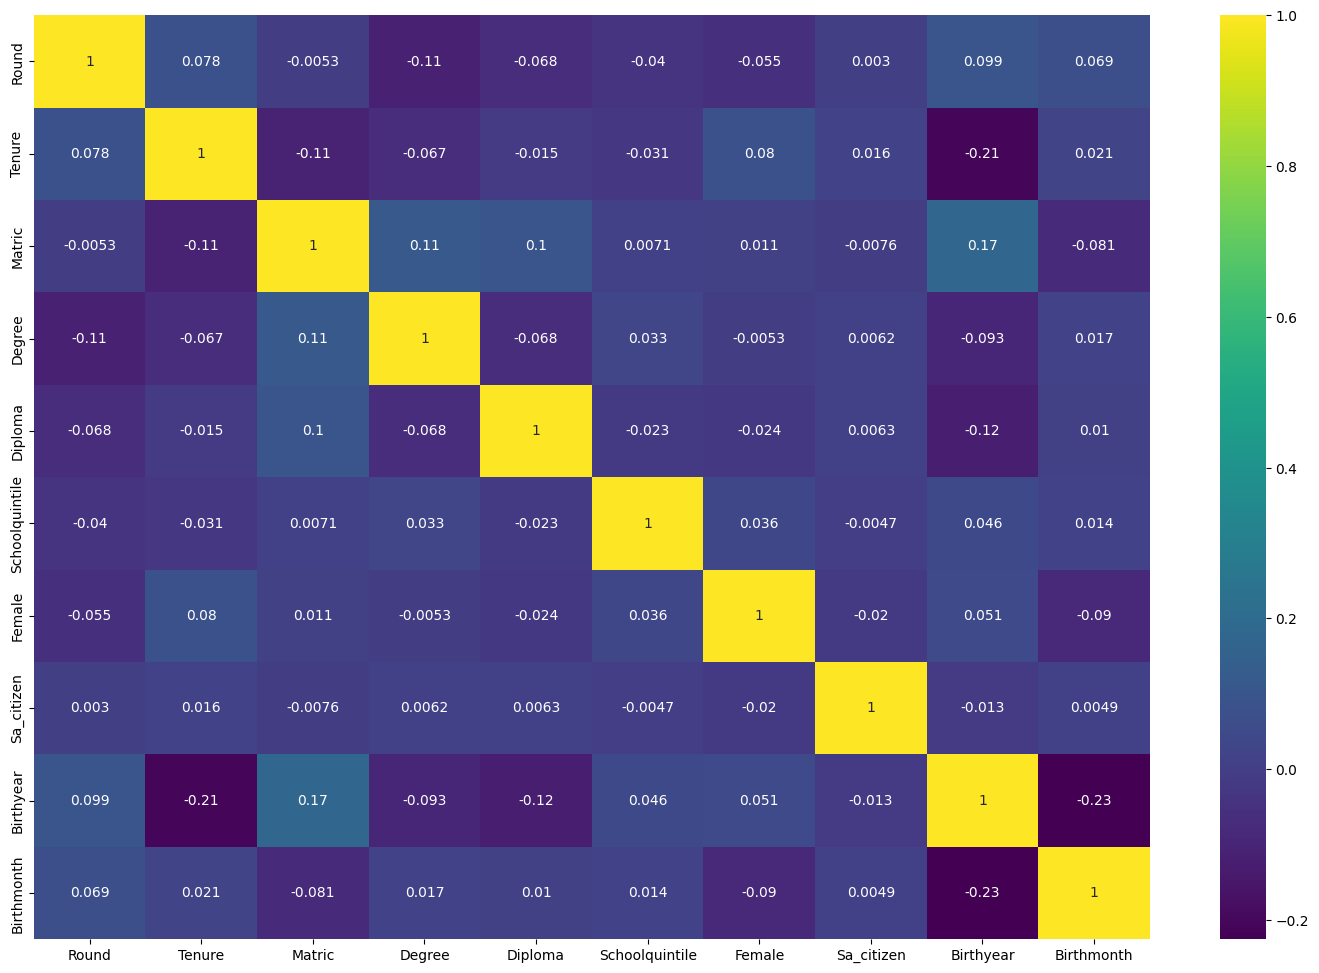

In [38]:
plotCorrelationHeatMap(train, numerical_cols, subset_length= 10)

### Plot relationship between independent and Independent Features

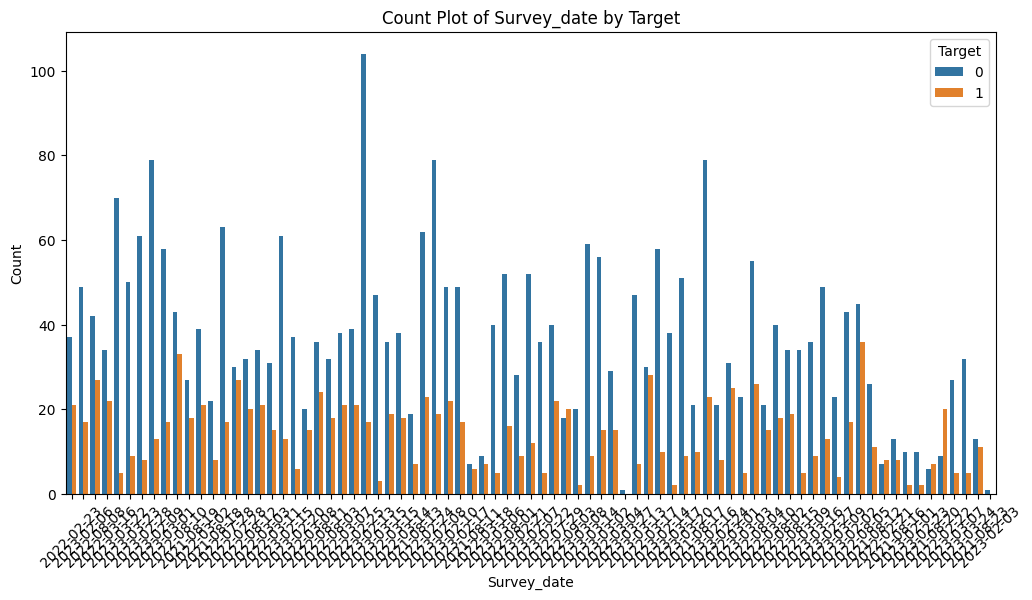

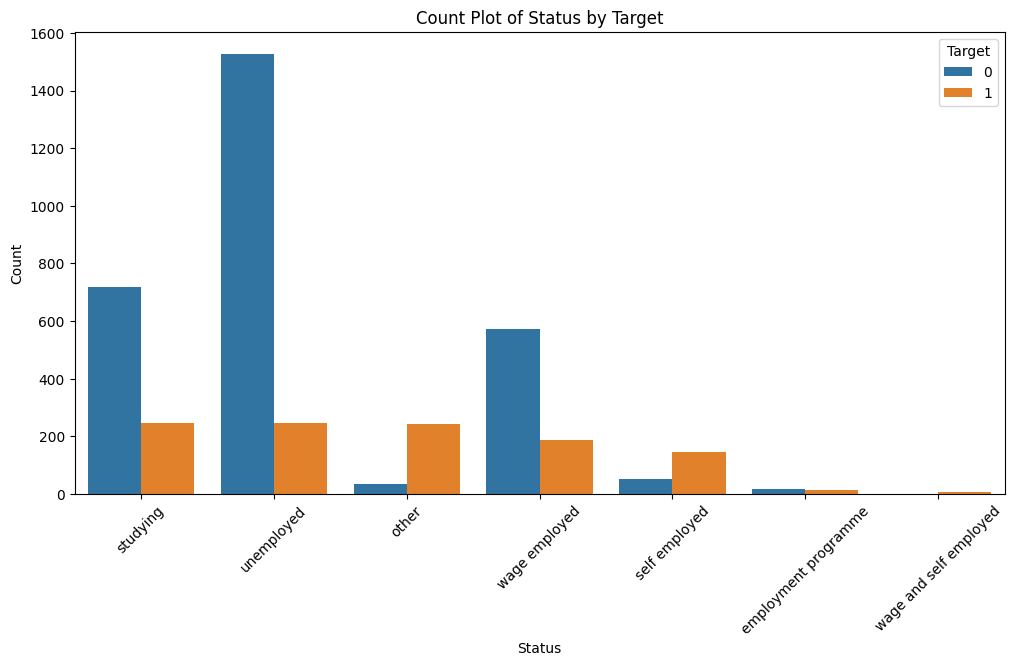

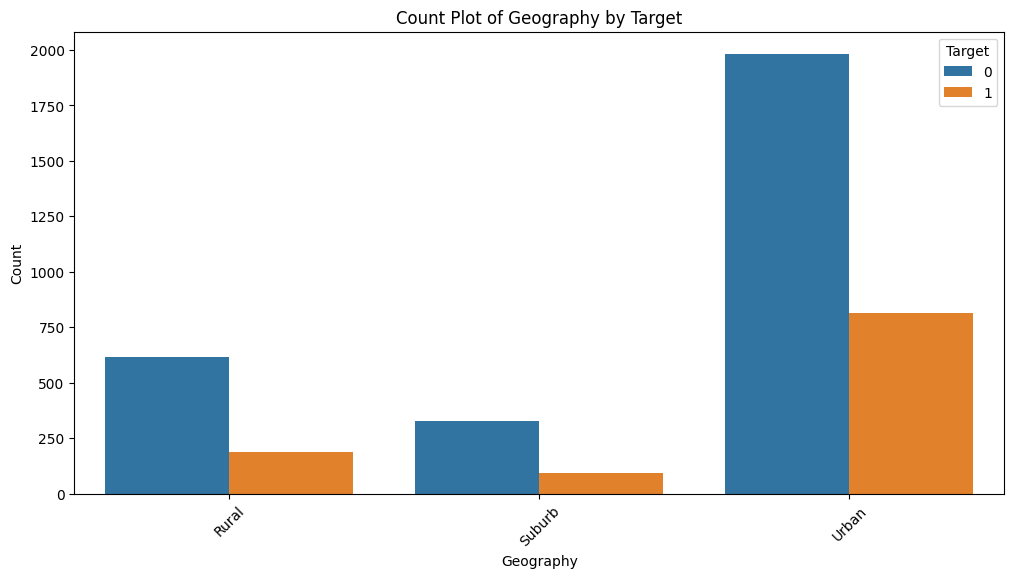

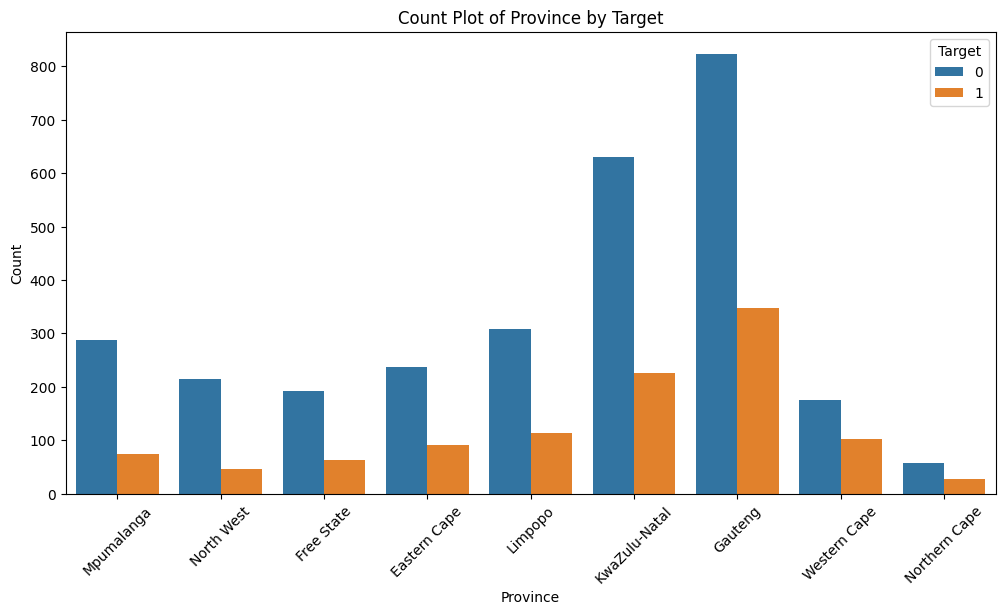

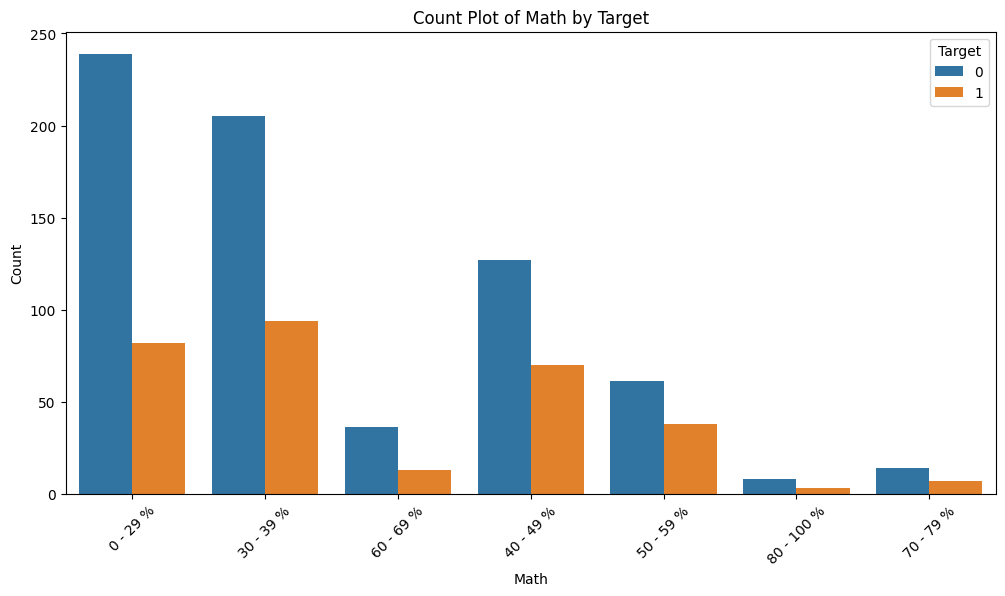

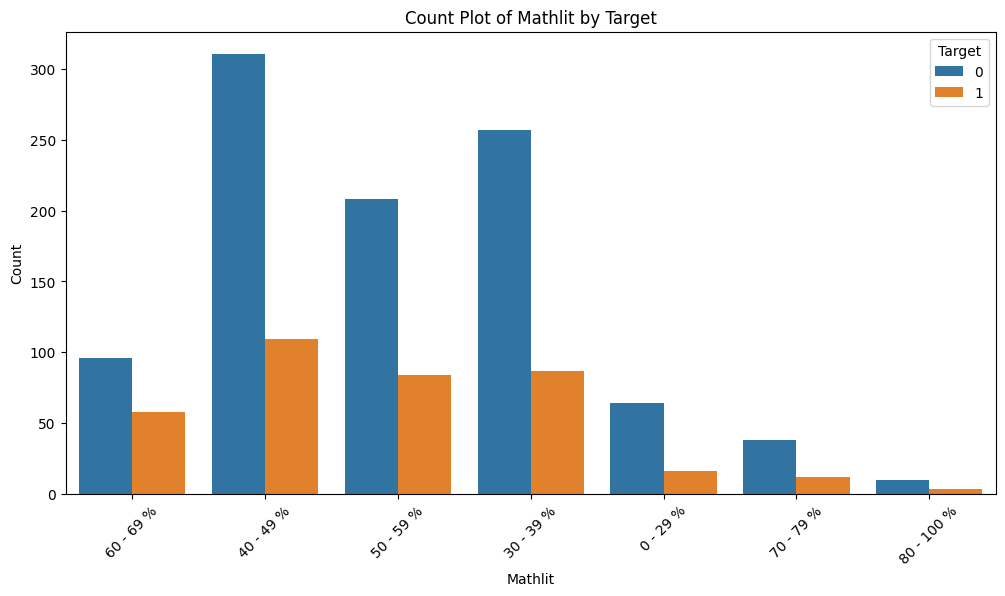

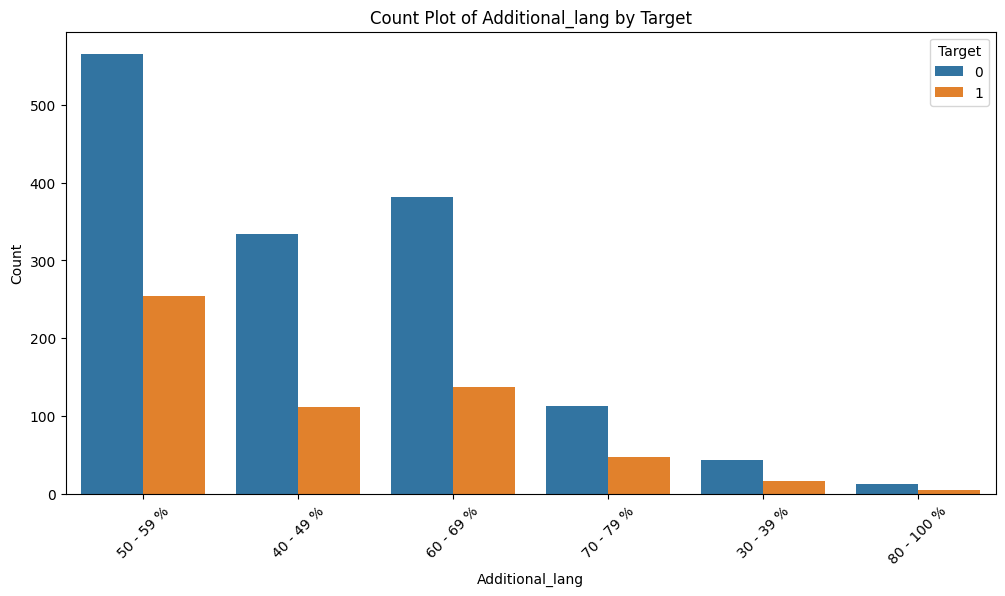

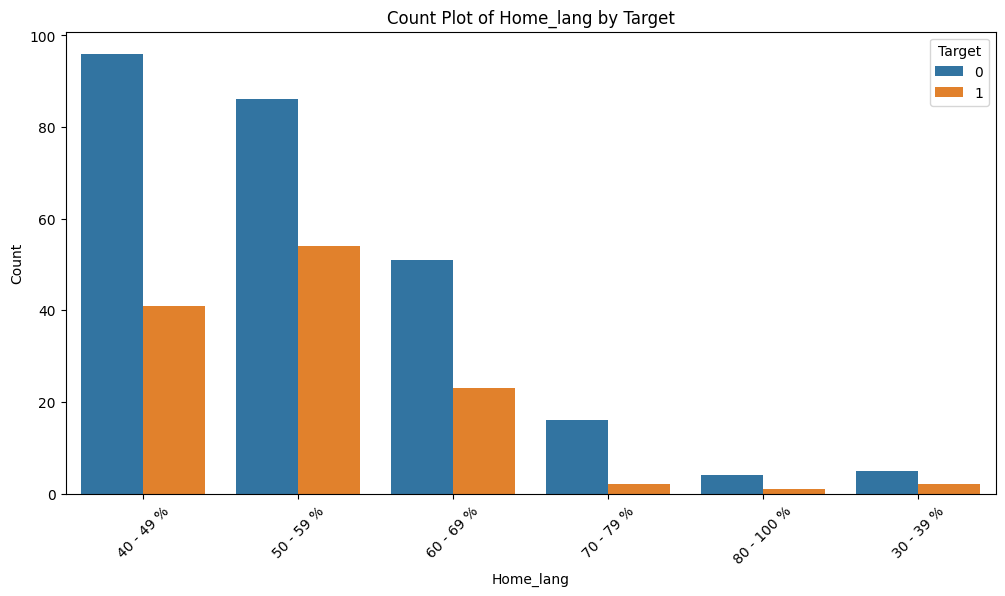

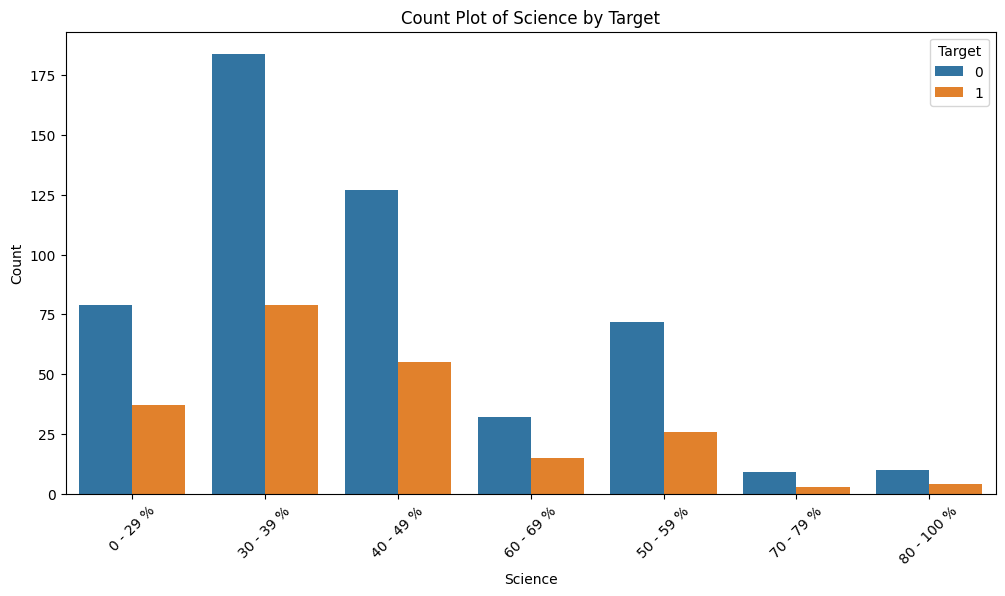

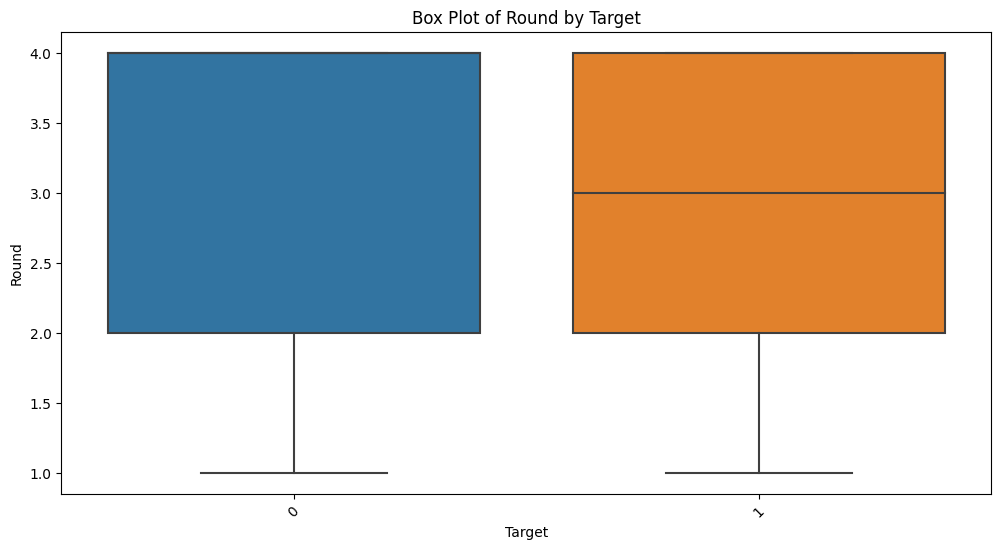

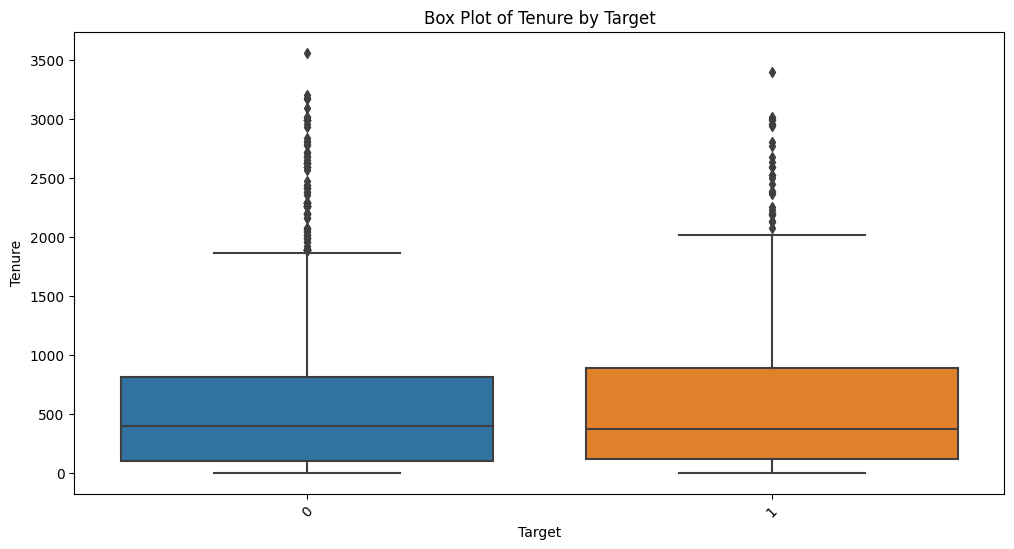

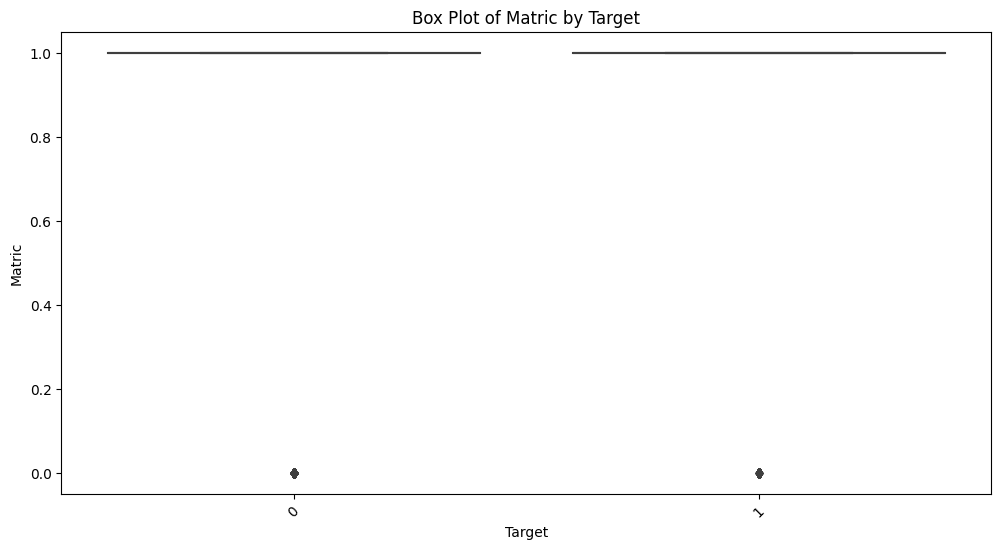

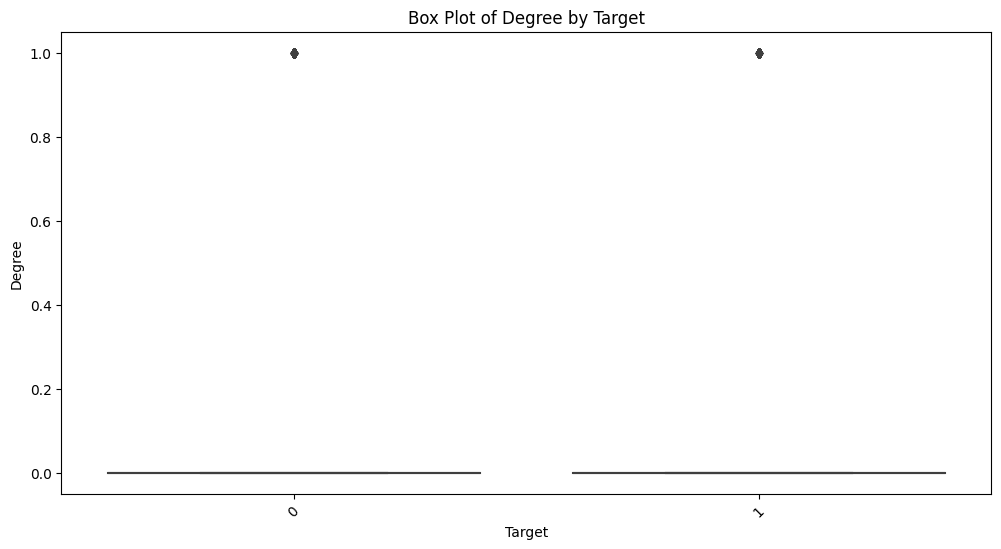

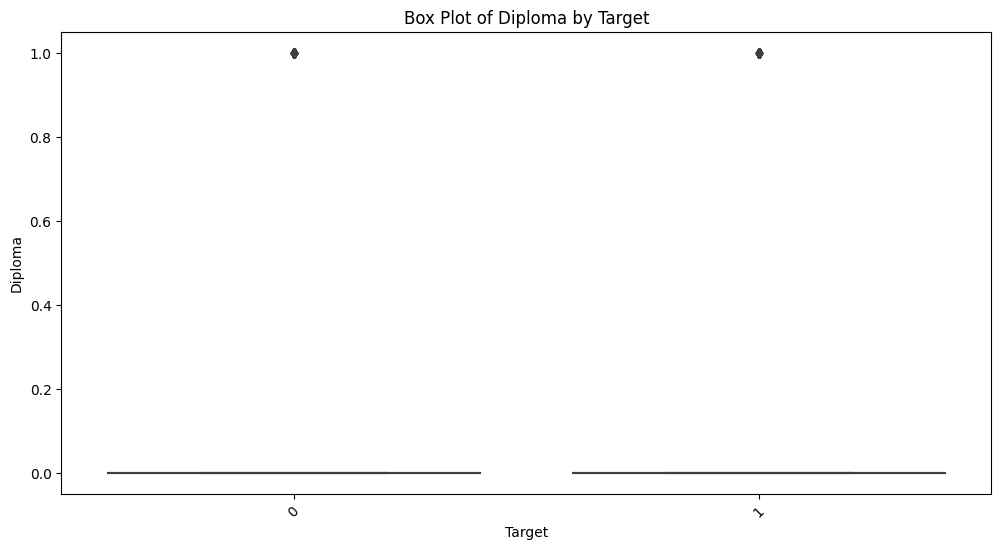

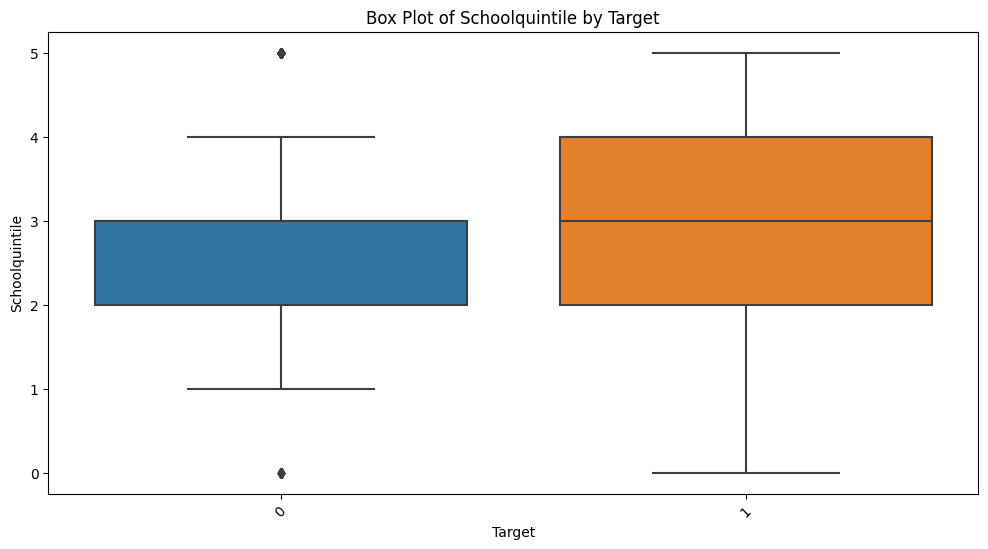

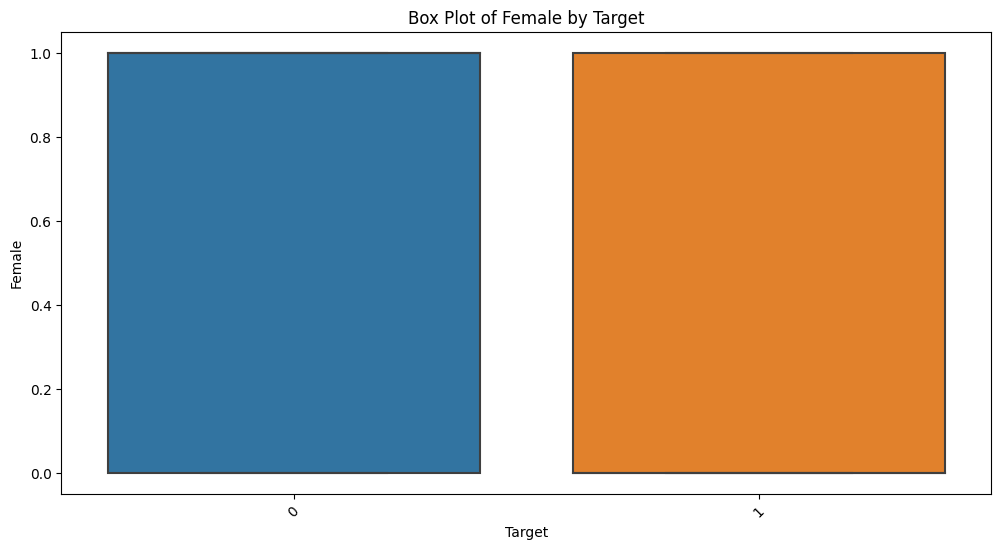

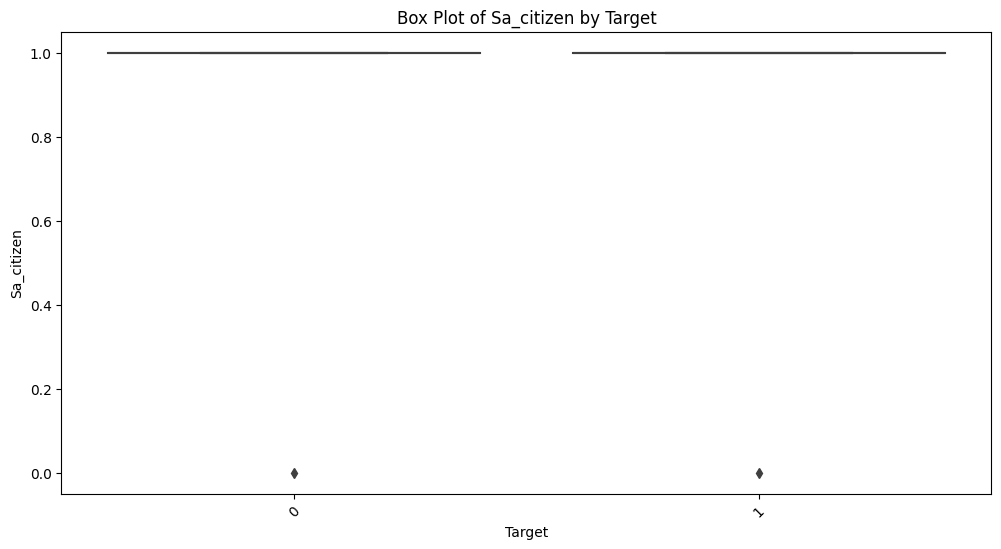

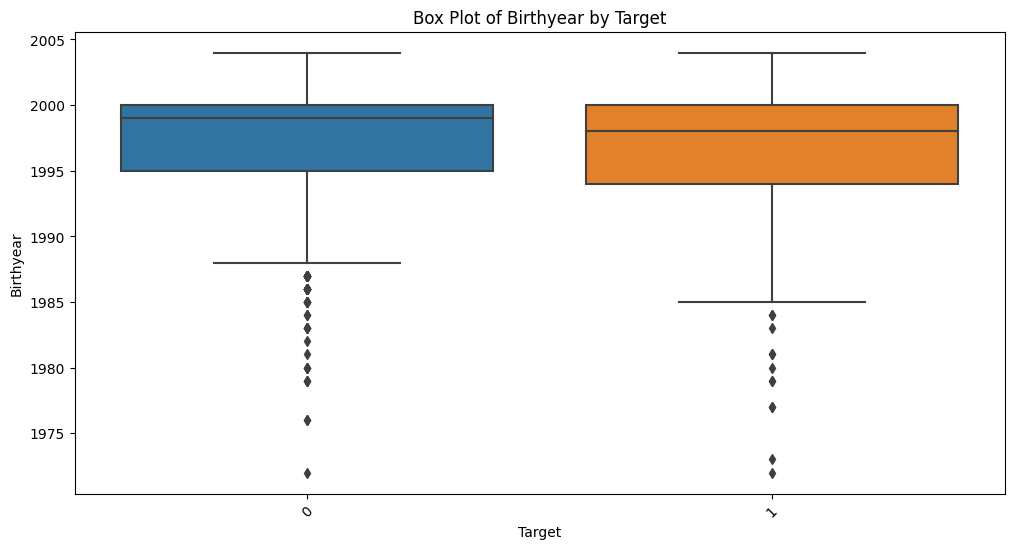

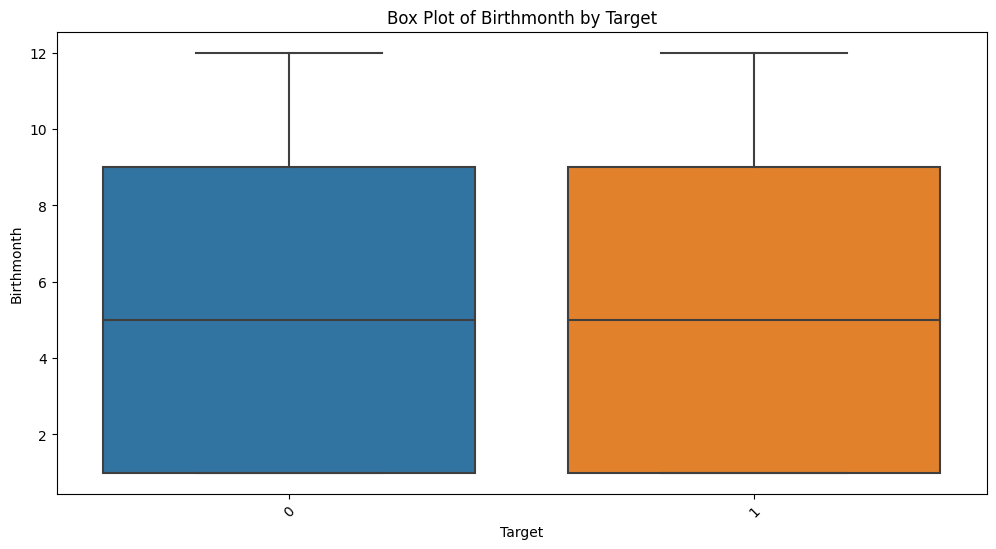

In [41]:
plot_relationship(train, categorical_cols, numerical_cols, target_column, "classification")

### Plot the target column

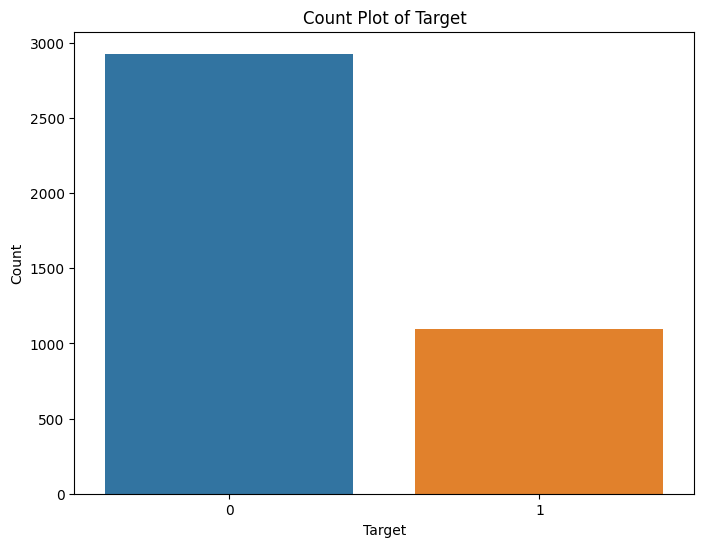

In [42]:
plot_target(train , target_column, "classification")

### Feature Engineering

In [57]:
le = LabelEncoder()
def extract_time_features(data, datetime_col):
  data[datetime_col] = pd.to_datetime(data[datetime_col])
  data['day'] = data[datetime_col].dt.day
  data['month'] = data[datetime_col].dt.month
  data['year'] = data[datetime_col].dt.year
  data['quarter'] = data[datetime_col].dt.quarter

  return data

def feature_engineering(train, test, id_column, target_column, categorical_cols, numerical_cols):
  data = pd.concat([train, test], ignore_index= True)

  data = extract_time_features(data, "Survey_date")

  for col in categorical_cols:
    data[col] = le.fit_transform(data[col])


  train = data[data[id_column].isin(train[id_column].unique())]
  test = data[data[id_column].isin(test[id_column].unique())]
  train['is_null'] = np.where(train['Home_lang'].isnull(),   1, 0)
  train['skf'] = train[target_column].astype('str') + "_" + train['is_null'].astype(str)
  useful_features = [col for col in train.columns if col not in ['is_null','skf', 'tenure', 'Survey_date', target_column, id_column]]
  print(useful_features)

  return train, test, useful_features






In [58]:
train, test, useful_features = feature_engineering(train, test, id_column, target_column, categorical_cols, numerical_cols)

['Round', 'Status', 'Tenure', 'Geography', 'Province', 'Matric', 'Degree', 'Diploma', 'Schoolquintile', 'Math', 'Mathlit', 'Additional_lang', 'Home_lang', 'Science', 'Female', 'Sa_citizen', 'Birthyear', 'Birthmonth', 'day', 'month', 'year', 'quarter']


### Modelling Part
#### Train_Test_Split

In [79]:
X = train.copy()
y = train[target_column]

X_train, X_valid, y_train, y_valid = train_test_split(X[useful_features], y , test_size = 0.15, stratify = train['skf'])

In [74]:
model = catt.CatBoostClassifier(random_state= 42, eval_metric = "AUC", auto_class_weights = 'Balanced')
model.fit(X_train, y_train, eval_set = (X_valid, y_valid), verbose = 250)

Learning rate set to 0.042926
0:	test: 0.7377771	best: 0.7377771 (0)	total: 2.31ms	remaining: 2.3s
250:	test: 0.8228652	best: 0.8228652 (250)	total: 512ms	remaining: 1.53s
500:	test: 0.8396855	best: 0.8396855 (500)	total: 1.04s	remaining: 1.03s
750:	test: 0.8368520	best: 0.8399494 (503)	total: 2.16s	remaining: 717ms
999:	test: 0.8368382	best: 0.8399494 (503)	total: 3.51s	remaining: 0us

bestTest = 0.8399494416
bestIteration = 503

Shrink model to first 504 iterations.


0.8399494416 local - 0.833584738 lb

In [75]:
y_preds = model.predict_proba(test[useful_features])[:,1]

In [76]:
test['preds'] = y_preds
sub = test[['Person_id', 'preds']]

In [77]:
sub.to_csv("Baseline_tts_2.csv", index= False)

#### Introducing Stratified KFold
https://towardsdatascience.com/10-1-cross-validation-techniques-visualized-9013095fb68e

In [82]:
n_splits = 10
skf = StratifiedKFold(n_splits , shuffle = True, random_state = 42)
model = catt.CatBoostClassifier(random_state = 42, eval_metric = "AUC", auto_class_weights = "Balanced")

fold_results = []
test_predictions_all_folds = []

for fold, (train_index, valid_index) in enumerate(skf.split(X, X['skf'])):
  X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
  y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

  X_train = X_train[useful_features]

  X_valid = X_valid[useful_features]

  model.fit(X_train, y_train, eval_set = (X_valid, y_valid), verbose = 250)

  valid_predictions = model.predict_proba(X_valid)[:,1]
  roc_auc = roc_auc_score(y_valid, valid_predictions)

  fold_results.append({
      'ROC AUC score': roc_auc
  })

  print(f"Fold {fold + 1}- ROC AUC SCORE: {roc_auc: .4f}")

  test_predictions_fold = model.predict_proba(test[useful_features])[:,1]

  test_predictions_all_folds.append(test_predictions_fold)


overall_roc_auc = np.mean([result['ROC AUC score'] for result in fold_results])
print(f"Overall Mean ROC Auc Score: {overall_roc_auc: .4f}")


Learning rate set to 0.043536
0:	test: 0.7580706	best: 0.7580706 (0)	total: 2.4ms	remaining: 2.39s
250:	test: 0.8775715	best: 0.8785421 (102)	total: 547ms	remaining: 1.63s
500:	test: 0.8698688	best: 0.8805461 (267)	total: 1.09s	remaining: 1.09s
750:	test: 0.8643266	best: 0.8805461 (267)	total: 1.65s	remaining: 546ms
999:	test: 0.8618530	best: 0.8805461 (267)	total: 2.2s	remaining: 0us

bestTest = 0.8805460751
bestIteration = 267

Shrink model to first 268 iterations.
Fold 1- ROC AUC SCORE:  0.8805
Learning rate set to 0.043536
0:	test: 0.7689670	best: 0.7689670 (0)	total: 2.4ms	remaining: 2.4s
250:	test: 0.8318252	best: 0.8318252 (250)	total: 548ms	remaining: 1.63s
500:	test: 0.8399662	best: 0.8413752 (332)	total: 1.1s	remaining: 1.09s
750:	test: 0.8404045	best: 0.8420014 (715)	total: 1.65s	remaining: 546ms
999:	test: 0.8389642	best: 0.8420014 (715)	total: 2.19s	remaining: 0us

bestTest = 0.8420014403
bestIteration = 715

Shrink model to first 716 iterations.
Fold 2- ROC AUC SCORE:  0.

0.8554 local

In [84]:
average_test_predictions = np.mean(test_predictions_all_folds, axis = 0)
submission = pd.DataFrame({
    'ID': test.Person_id,
    'preds': average_test_predictions
})
submission.to_csv("fold_baseline.csv", index = False)

#### To dos
* More Feature Engineering
* Re Introduce Tenure,
* One Hot Encoding, e.tc e.tc